In [1]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import pandas as pd
import os

In [2]:
# load the data
# data = [
#     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     [1.0, 0.0, 0.0, 1.0, 0.0, 0.0], 
#     [1.0, 0.0, 0.0, 0.0, 1.0, 0.0], 
#     [0.0, 0.0, 1.0, 1.0, 0.0, 1.0], 
#     [0.0, 0.0, 1.0, 1.0, 0.0, 1.0], 
#     [0.0, 0.0, 1.0, 0.0, 0.0, 1.0], 
#     [0.0, 1.0, 0.0, 0.0, 0.0, 1.0], 
#     [0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
#     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
#     [0.0, 1.0, 0.0, 0.0, 1.0, 1.0],

#     ]
# df = pd.DataFrame(data, columns = ['a1','a2', 'a3','a4', 'a5','a6'])
# df = pd.read_csv('pp_gas_emmision/gt_2015.csv')

filepaths = ['pp_gas_emmision/'+f for f in os.listdir("pp_gas_emmision") if f.endswith('.csv')]
print('Files data import from:')
for path in filepaths:
    print(path)
df = pd.concat(
        map(pd.read_csv, filepaths), ignore_index=True)
    
print(df.head())
print(df.tail())

Files data import from:
pp_gas_emmision/gt_2014.csv
pp_gas_emmision/gt_2015.csv
pp_gas_emmision/gt_2011.csv
pp_gas_emmision/gt_2012.csv
pp_gas_emmision/gt_2013.csv
       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  8.8358  1022.2  98.762  3.2422  23.152  1067.5  549.94  126.16  11.381   
1  9.0529  1021.8  97.464  3.2074  23.207  1067.9  549.80  126.51  11.476   
2  9.2464  1021.3  96.494  3.2051  23.296  1068.5  549.89  126.96  11.555   
3  9.3792  1020.9  95.912  3.2159  23.465  1069.6  549.94  127.83  11.539   
4  9.5757  1020.8  95.412  3.1898  23.205  1068.1  549.83  126.56  11.484   

       CO     NOX  
0  1.9157  68.292  
1  2.0596  68.610  
2  2.1621  68.324  
3  2.1214  67.619  
4  2.1549  66.499  
           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
36728  4.8631  1027.0  81.084  4.2825  34.045  1100.0  529.98  168.38  14.290   
36729  4.5173  1027.4  80.813  4.2481  33.904  1100.1  530.47  168.07  14.344   
36730  4.2

In [3]:
def normalize(vec):
    return vec / np.sqrt(vec.dot(vec))

In [4]:
alpha      = 0.20                    # learning rate
iterations = 1000000                 # number of iterations
n_output   = 20                      # number of output neurons/clusters
n_pixels   = len(df.columns)         
n_samples  = len(df)                 # total samples in training data
print(len(df))
colors = []

for i in range(n_output):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

36733


In [5]:
# Create a random number generator to sample the dataset using
rng = np.random.default_rng()
    
# Keep track of our changing prototypes
w_chg_ls = list()

In [6]:
# Initialize weights
# max_value = df.max().max()
# min_value = df.min().min()
# print('weights between '+str(min_value)+' and '+str(max_value))
# W = np.random.uniform(low=min_value, high=max_value, size = (n_output, n_pixels))
# print(W)
# for x in range(n_output):
#     W[x] = normalize(W[x])
# print(W)

W = df.sample(n = n_output, ignore_index=True).to_numpy()
print(W)

[[6.5902e+00 1.0108e+03 8.5983e+01 3.2004e+00 2.4622e+01 1.0755e+03
  5.4977e+02 1.3131e+02 1.1634e+01 3.1514e+00 6.7253e+01]
 [2.0895e+01 1.0059e+03 7.6320e+01 3.8466e+00 2.5741e+01 1.0829e+03
  5.4991e+02 1.3481e+02 1.1998e+01 1.1864e+00 6.1671e+01]
 [2.5449e+01 1.0110e+03 7.3874e+01 4.4871e+00 2.5817e+01 1.0780e+03
  5.4706e+02 1.2860e+02 1.2037e+01 2.4161e+00 5.8431e+01]
 [5.4839e+00 1.0160e+03 9.6092e+01 4.5288e+00 2.3852e+01 1.0847e+03
  5.5010e+02 1.3512e+02 1.1866e+01 1.8067e+00 8.2097e+01]
 [2.2617e+01 1.0115e+03 8.8926e+01 3.9302e+00 2.4796e+01 1.0873e+03
  5.4994e+02 1.3072e+02 1.1968e+01 1.3557e+00 5.5894e+01]
 [4.2486e+00 1.0255e+03 8.9004e+01 2.7579e+00 2.3091e+01 1.0833e+03
  5.4998e+02 1.3393e+02 1.1688e+01 2.2346e+00 8.2316e+01]
 [2.2792e+01 1.0147e+03 8.1077e+01 2.8360e+00 1.7878e+01 1.0546e+03
  5.4857e+02 1.0981e+02 1.0426e+01 2.1945e+00 4.8670e+01]
 [6.8561e+00 1.0213e+03 8.7797e+01 3.4176e+00 2.3956e+01 1.0730e+03
  5.4999e+02 1.3098e+02 1.1755e+01 1.2638e+00 6.49

        0       1       2       3       4       5       6       7       8   \
0   6.5902  1010.8  85.983  3.2004  24.622  1075.5  549.77  131.31  11.634   
1  20.8950  1005.9  76.320  3.8466  25.741  1082.9  549.91  134.81  11.998   
2  25.4490  1011.0  73.874  4.4871  25.817  1078.0  547.06  128.60  12.037   
3   5.4839  1016.0  96.092  4.5288  23.852  1084.7  550.10  135.12  11.866   
4  22.6170  1011.5  88.926  3.9302  24.796  1087.3  549.94  130.72  11.968   

       9       10  
0  3.1514  67.253  
1  1.1864  61.671  
2  2.4161  58.431  
3  1.8067  82.097  
4  1.3557  55.894  


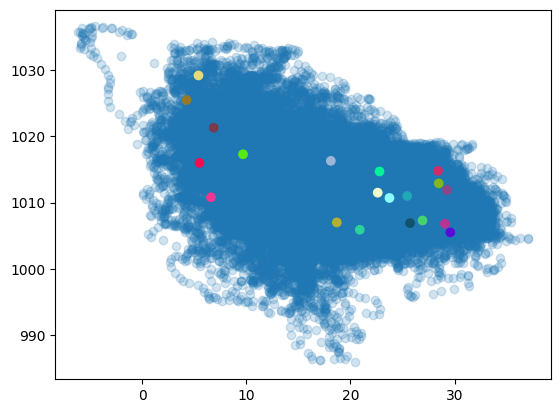

In [7]:
df_w = pd.DataFrame(W)
print(df_w.head())
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', alpha = alpha )
plt.scatter(df_w.loc[:,0], df_w.loc[:,1],  marker = 'o', c = colors)
# plt.scatter(df.iloc[0,0], df.iloc[0,1],  marker = 'o', c = 'g')
# for i in range(df_w.shape[0]):
#     plt.text(df_w.iloc[i,0]+1, df_w.iloc[i,1]+1, s = df_w.index[i], c = colors[i])

In [8]:
def training():          
    for t in range(iterations):
        
        # Keep track of changing weights
        # for visualization
        if t % 1000:
            w_chg_ls.append(np.copy(W))
        
        # Select a random data pattern
        rand_i = rng.integers(n_samples)
        input_vec = np.array(df.loc[rand_i])
        
        # Find the winning neuron
        win_index = np.argmax(np.dot(W,input_vec))
        
        # Apply the delta rule
        W[win_index] += alpha * (input_vec - W[win_index]) 
        
#         W[win_index] = normalize(W[win_index])
        
    return W

In [9]:
weights = training()
weights

array([[  16.63708178, 1009.22221991,   84.51665837,    3.56346635,
          22.84435153, 1058.58490662,  543.18311107,  120.5438582 ,
          11.26322916,    8.39967358,   66.65363104],
       [  14.50095712, 1009.28285162,   78.68771908,    3.07554794,
          21.33082706, 1056.58780114,  545.725443  ,  116.81264174,
          10.91648876,    6.6506739 ,   78.28119376],
       [  12.55663656, 1013.7714446 ,   79.99848716,    3.24415746,
          21.69720177, 1053.51746964,  544.37755138,  117.53749974,
          10.94983029,    5.7704066 ,   80.91847773],
       [  16.10593702, 1015.53163995,   83.18706507,    3.500978  ,
          22.01155145, 1053.67338227,  540.44916764,  117.74198155,
          11.13394199,   11.73037693,   76.56312694],
       [  17.03928253, 1007.56004062,   71.01732574,    3.21393404,
          22.46411875, 1055.90902004,  545.36964479,  116.64839354,
          11.00490747,    9.50631549,   71.09654039],
       [  13.56964377, 1010.49689461,   78.7542845

In [10]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error

In [11]:

def assign_centroid(data, centroids):
        
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

In [12]:
print('plotting final graph')
df_weights = pd.DataFrame(weights)
df['centroid'], df['error'] = assign_centroid(df.iloc[:,:2] ,df_weights)
df[['centroid', 'error']].head()

# colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c = df['centroid'].apply(lambda x: colors[x]), alpha = alpha)
plt.scatter(df_weights.iloc[:,0], df_weights.iloc[:,1],  marker = 'o', s=100, 
           c = df_weights.index.map(lambda x: colors[x]))

print('execution complete')

plotting final graph
